## Import Libraries

In [1]:
import kagglehub
import pandas as pd
import os
import missingno as msno
import re
import seaborn as sns
import matplotlib.pyplot as plt

/home/ubuntu/ricardo/telco_customer_churn/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load Data

In [2]:

# Descargar el dataset (esto descarga todos los archivos)
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print(f"Dataset descargado en: {path}")

# Listar archivos descargados
files = os.listdir(path)
print(f"Archivos disponibles: {files}")

# Leer el archivo CSV específico
csv_file = os.path.join(path, "WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.read_csv(csv_file)

Dataset descargado en: /home/ubuntu/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1
Archivos disponibles: ['WA_Fn-UseC_-Telco-Customer-Churn.csv']


## EDA

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The target the we will use to guide the exploration is Churn

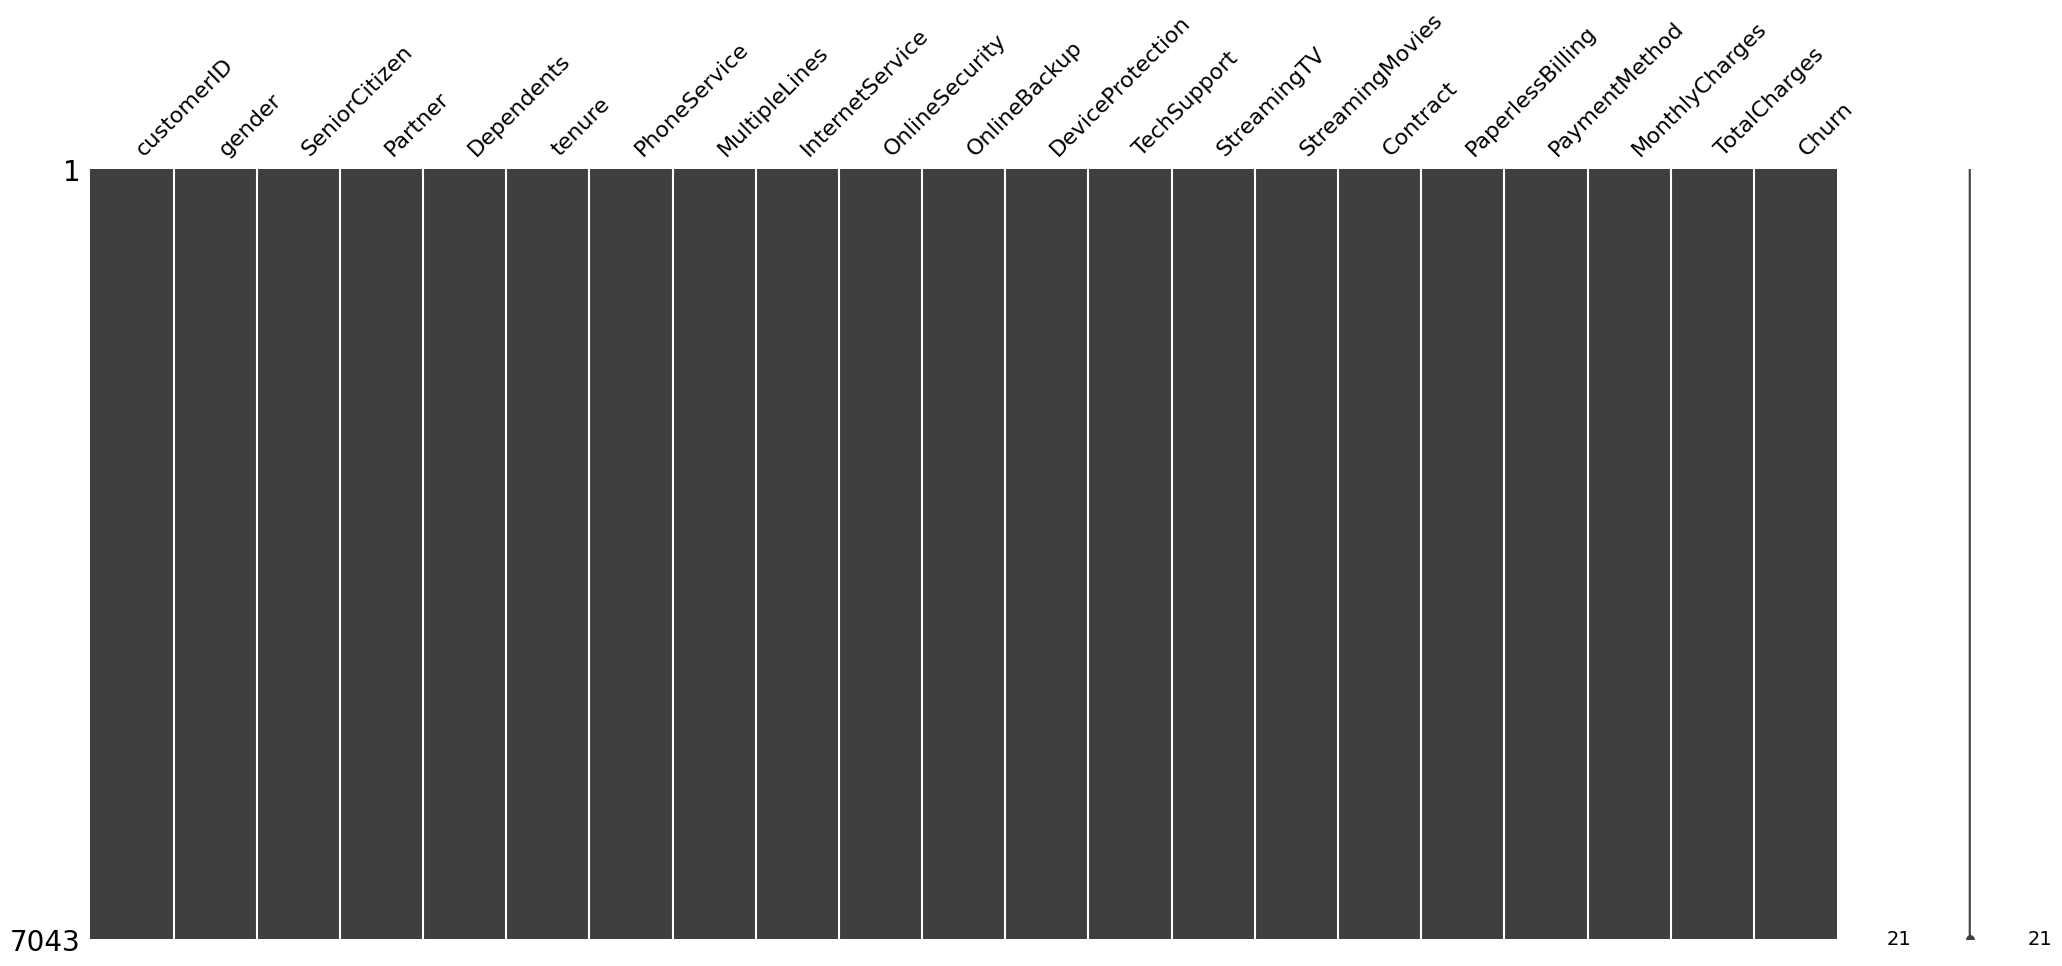

In [6]:
# Visualize missing values as a matrix
msno.matrix(df);

<Axes: >

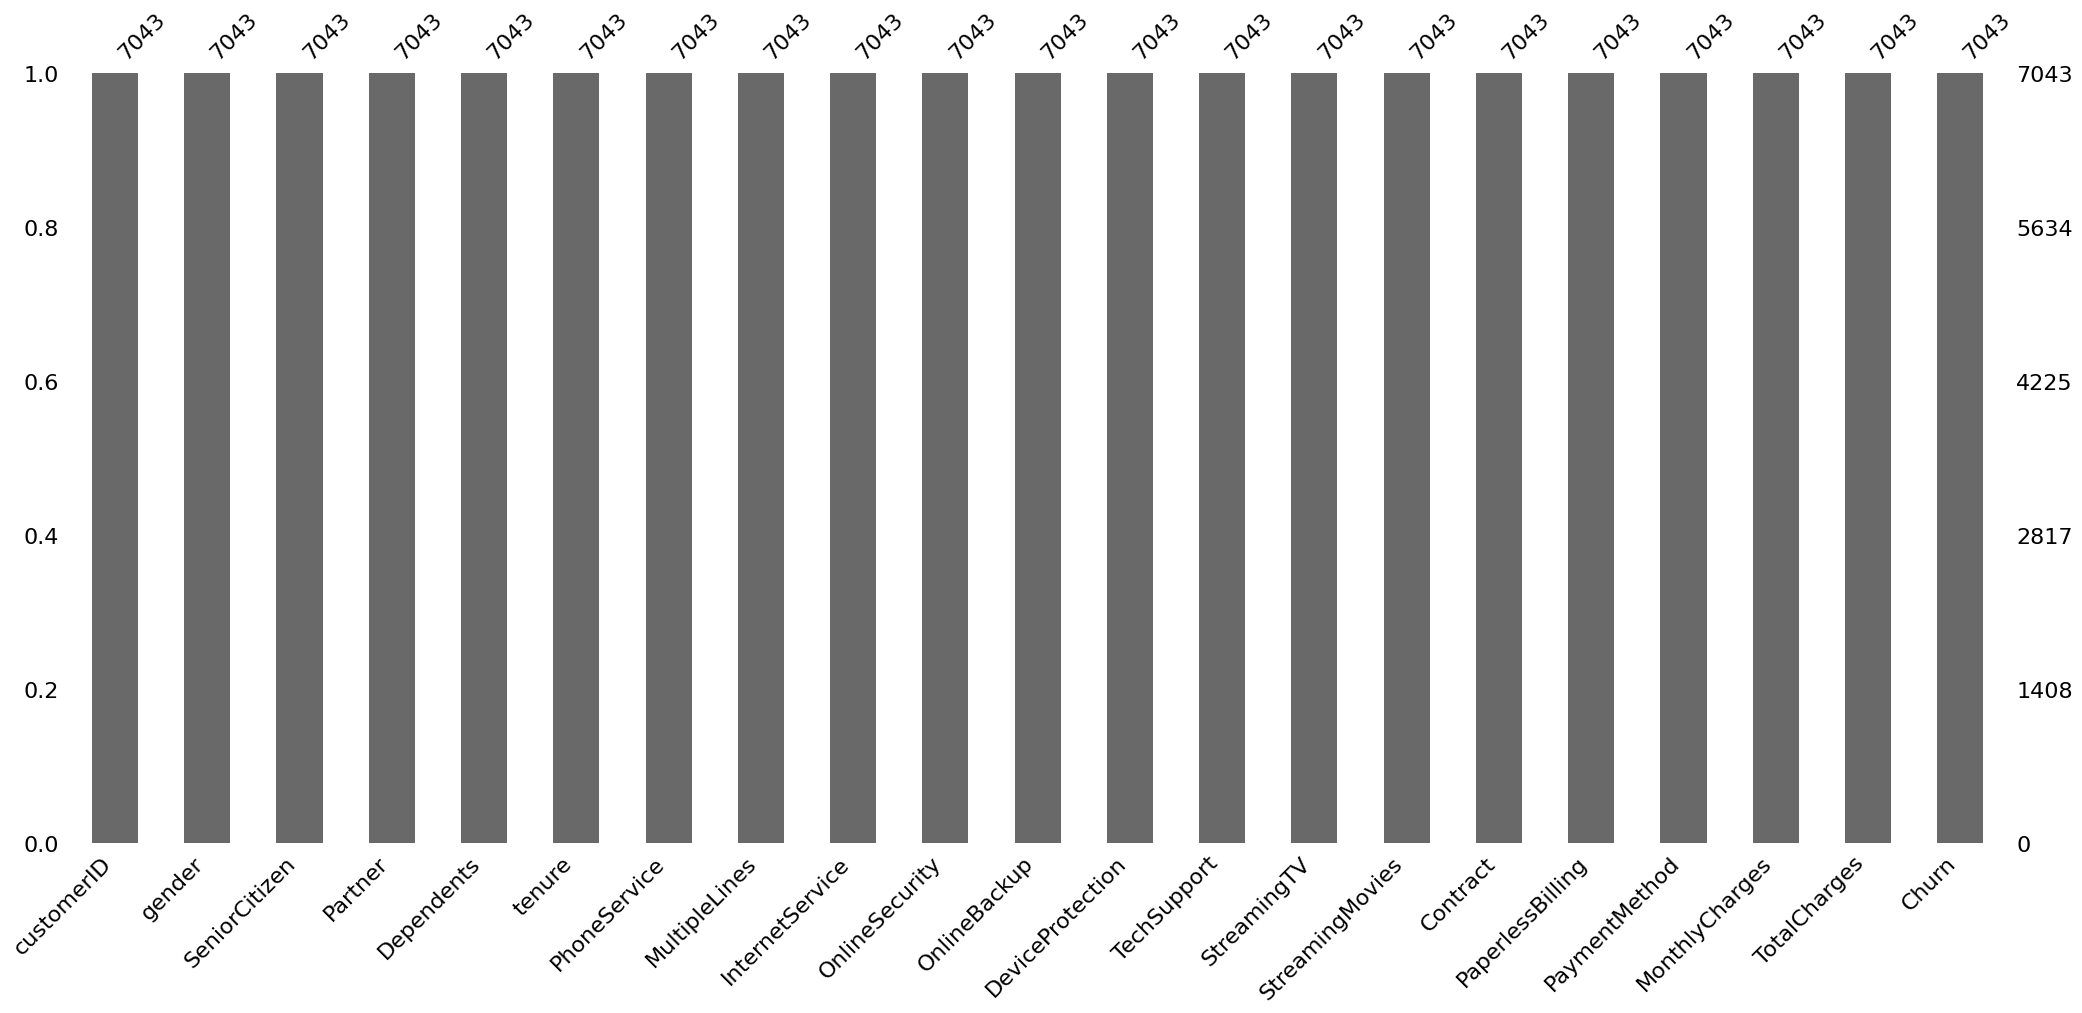

In [7]:
msno.bar(df)

There is not missing values in the dataset.

In [8]:
df.duplicated().sum()

np.int64(0)

There is also no duplicated values in the dataset.

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Data Preprocessing

In [10]:
df.drop(['customerID'], axis = 1, inplace = True)

In [11]:
# Crear función para cambiar nombres de columnas
def to_snake_case(name):
    name = name.replace(' ', '_')
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

# Renombrar columnas usando la función to_snake_case
df.columns = [to_snake_case(col) for col in df.columns]
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [12]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')
df.isnull().sum()

gender                0
senior_citizen        0
partner               0
dependents            0
tenure                0
phone_service         0
multiple_lines        0
internet_service      0
online_security       0
online_backup         0
device_protection     0
tech_support          0
streaming_tv          0
streaming_movies      0
contract              0
paperless_billing     0
payment_method        0
monthly_charges       0
total_charges        11
churn                 0
dtype: int64

Here we see that the TotalCharges has 11 missing values. Let's check this data.

In [13]:
df[df['total_charges'].isnull()]

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Let's delete the rows with missing values in "total_charges" columns since there are only 11 rows and deleting them will not affect the data.

In [14]:
df = df[df['total_charges'].notna()]

In [15]:
df.isnull().sum()

gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract             0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [16]:
df["senior_citizen"]= df["senior_citizen"].map({0: "No", 1: "Yes"})
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df['internet_service'].describe()

count            7032
unique              3
top       Fiber optic
freq             3096
Name: internet_service, dtype: object

In [18]:
df.describe()

,tenure,monthly_charges,total_charges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## Data Analysis

Lets verify the distribution of the target variable.

In [40]:
numeric_columns = ["tenure", "monthly_charges", "total_charges"]
target_column = ['churn']
categorical_columns = list(set(df.columns) - set(numeric_columns) - set(target_column))
categorical_columns

['internet_service',
 'multiple_lines',
 'contract',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'payment_method',
 'dependents',
 'phone_service',
 'senior_citizen',
 'online_security',
 'gender',
 'device_protection',
 'partner',
 'online_backup',
 'tech_support']

### Numerical variables analysis

In [31]:
import numpy as np

tenure: mean=32.42 | median=29.00 | skew=0.24
monthly_charges: mean=64.80 | median=70.35 | skew=-0.22
total_charges: mean=2283.30 | median=1397.47 | skew=0.96


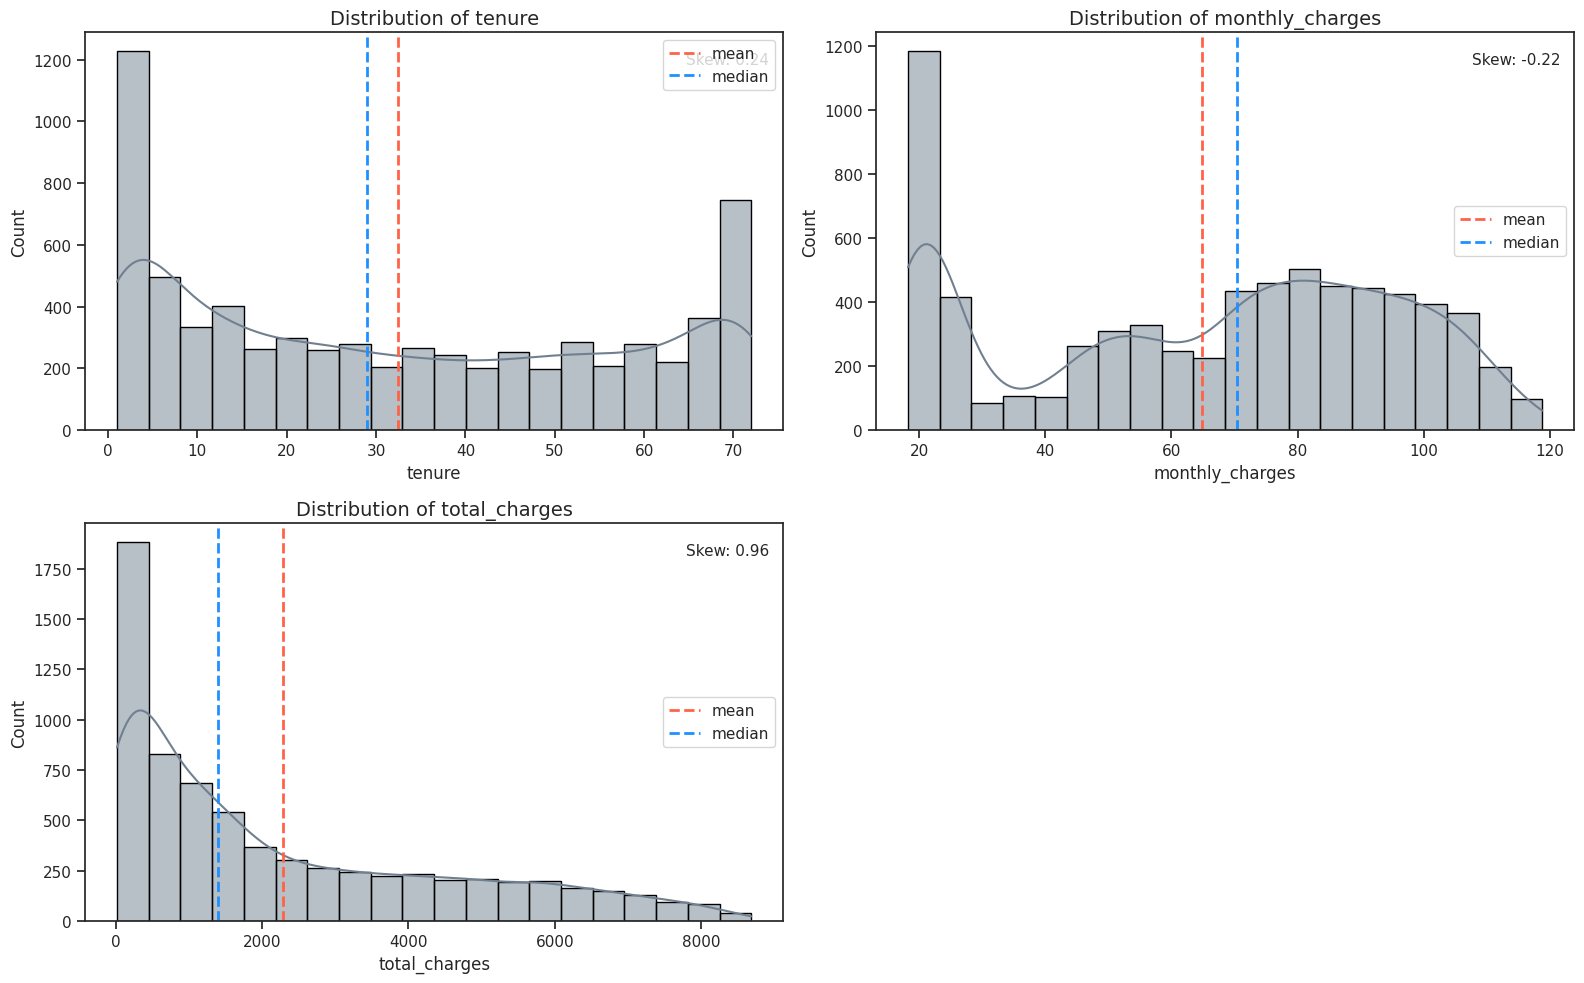

In [35]:
# --- 1) Hist + KDE + líneas media/mediana + skew ---
num_vars = len(numeric_columns)
num_cols = 2
num_rows = int(np.ceil(num_vars / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 5 * num_rows))
axes = np.array(axes).reshape(-1)  # aplanar siempre

for i, col in enumerate(numeric_columns):
    ax = axes[i]

    # Histograma + KDE
    sns.histplot(df[col], bins=20, kde=True, ax=ax, color="slategray", edgecolor="black")

    # Media / Mediana
    mean_val = df[col].mean()
    median_val = df[col].median()
    mean_line = ax.axvline(mean_val, linestyle="--", linewidth=2, color="tomato", label="mean")
    median_line = ax.axvline(median_val, linestyle="--", linewidth=2, color="dodgerblue", label="median")

    # Skewness (asimetría)
    skew_val = df[col].skew()
    ax.text(
        0.98, 0.95,
        f"Skew: {skew_val:.2f}",
        transform=ax.transAxes,
        ha="right", va="top",
        fontsize=11
    )

    # Títulos y ejes
    ax.set_title(f"Distribution of {col}", fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)
    ax.legend()

    # Prints limpios (si los quieres en consola)
    print(f"{col}: mean={mean_val:.2f} | median={median_val:.2f} | skew={skew_val:.2f}")

# Eliminar ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### 📊 Numerical Variables — Key Insights

**Tenure**

* Distribución relativamente balanceada con ligera asimetría positiva (skew ≈ 0.24).
* La media (32.4) es ligeramente mayor que la mediana (29), lo que sugiere una leve cola hacia clientes con mayor antigüedad.
* Se observa concentración importante de clientes en los primeros meses, junto con un grupo significativo de clientes de larga permanencia.
* Esto sugiere dos segmentos claros: clientes nuevos y clientes leales.
* Es probable que el churn se concentre en clientes con menor tenure, lo cual se verificará en el análisis posterior vs churn.

**Monthly Charges**

* Distribución ligeramente sesgada a la izquierda (skew ≈ -0.22).
* La mediana (70.35) es mayor que la media (64.8), indicando presencia de clientes con cargos mensuales bajos que reducen el promedio.
* Se observan dos posibles segmentos: planes básicos de bajo costo y planes más completos de mayor costo.
* Esta variable podría ser relevante para segmentar clientes según tipo de servicio y analizar su relación con churn.
* Se evaluará si cargos mensuales más altos están asociados a mayor probabilidad de churn.

**Total Charges**

* Distribución fuertemente sesgada a la derecha (skew ≈ 0.96).
* La media (2283.3) es considerablemente mayor que la mediana (1397.47), indicando una cola larga de clientes con altos cargos acumulados.
* Esta variable está altamente influenciada por el tenure, ya que representa el gasto acumulado del cliente a lo largo del tiempo.
* Es esperable una alta correlación entre total_charges y tenure, por lo que podría aportar menor valor predictivo independiente en modelos de churn.
* Se evaluará su relación con churn y posible necesidad de transformaciones (por ejemplo, log-transform) para modelado.

* Tenure appears to be the strongest structural variable, with a clear separation between early-stage and long-term customers.
* Total charges is heavily right-skewed and likely correlated with tenure, meaning it may not add significant independent predictive power.
* Monthly charges shows slight negative skewness and potential segmentation between basic and premium plans.

/tmp/ipykernel_299130/3580610886.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_299130/3580610886.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipykernel_299130/3580610886.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


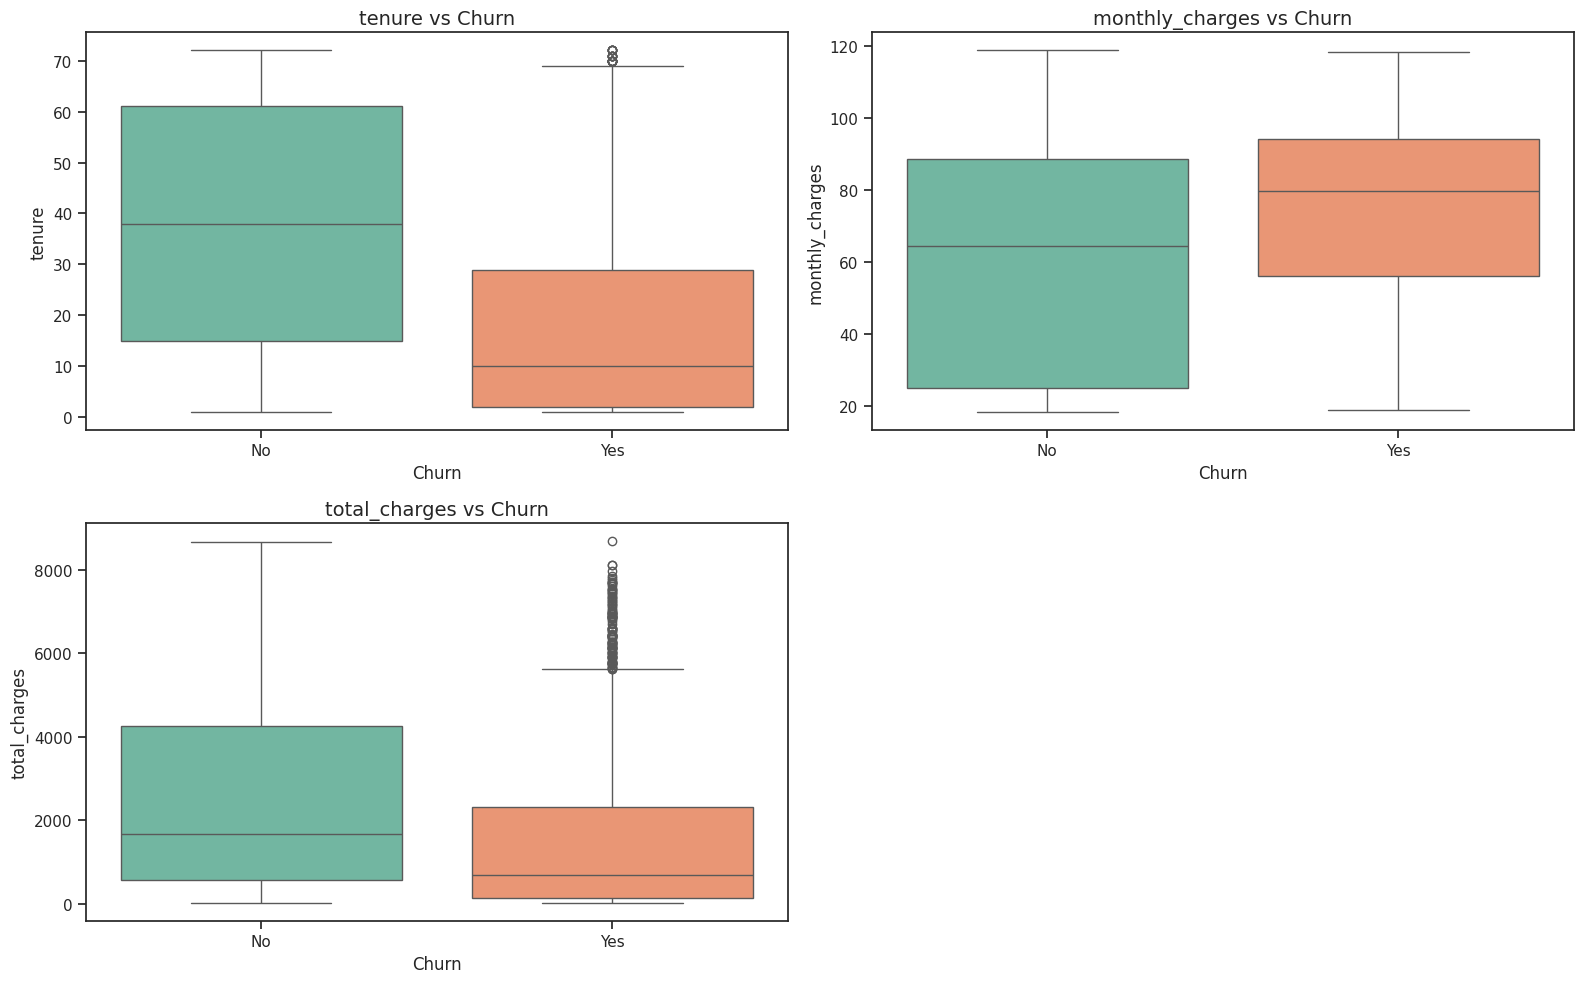

In [36]:
sns.set(style="ticks")

num_vars = numeric_columns
num_cols = 2
num_rows = int(np.ceil(len(num_vars) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 5 * num_rows))
axes = np.array(axes).reshape(-1)

for i, col in enumerate(num_vars):
    sns.boxplot(
        x="churn",
        y=col,
        data=df,
        ax=axes[i],
        palette="Set2"
    )
    
    axes[i].set_title(f"{col} vs Churn", fontsize=14)
    axes[i].set_xlabel("Churn")
    axes[i].set_ylabel(col)

# Eliminar ejes sobrantes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



# 📊 Tenure vs Churn — interpretación correcta

**Qué muestra el boxplot:**

* La mediana de tenure para clientes que churnean es mucho menor.
* La mayoría de clientes que se van tienen pocos meses.
* Los clientes que se quedan tienen tenure mucho más alto y distribuido.

**Interpretación mejorada:**

* Los clientes con menor antigüedad presentan una probabilidad significativamente mayor de churn.
* Existe una clara separación entre las distribuciones: los clientes que permanecen en la compañía tienen un tenure considerablemente mayor.
* Esto sugiere que el churn ocurre principalmente en etapas tempranas del ciclo de vida del cliente.
* Tenure se perfila como una de las variables más predictivas del churn.

💡 Esta es probablemente la variable más importante del dataset.

---

# 📊 Monthly Charges vs Churn — interpretación correcta

Tu interpretación iba bien, pero la refinamos.

**Qué muestra el boxplot:**

* La mediana de monthly charges es mayor en clientes que churnean.
* La caja de churn está desplazada hacia valores más altos.
* Hay diferencia visible, pero con cierta superposición.

**Interpretación mejorada:**

* Los clientes que churnean tienden a tener cargos mensuales más altos que aquellos que permanecen.
* Se observa un desplazamiento general de la distribución hacia valores superiores en el grupo churn.
* Esto sugiere que precios más altos o planes más costosos podrían estar asociados a mayor probabilidad de cancelación.
* Sin embargo, existe cierta superposición entre ambos grupos, por lo que esta variable por sí sola no explica completamente el churn.

💡 Buena variable predictiva, pero no tan fuerte como tenure.

---

# 📊 Total Charges vs Churn — interpretación correcta

Aquí tu interpretación estaba incompleta.

No se trata solo de outliers.

**Qué muestra el boxplot:**

* Clientes que churnean tienen total charges mucho menores.
* Mediana significativamente menor.
* Clientes que permanecen tienen acumulado mucho mayor.

**Interpretación mejorada:**

* Los clientes que churnean presentan cargos totales acumulados significativamente menores.
* Esto refleja que la mayoría de clientes que abandonan el servicio lo hacen en etapas tempranas, antes de acumular un gasto elevado.
* Los clientes que permanecen muestran una distribución más amplia y valores acumulados considerablemente mayores.
* Esta variable está fuertemente influenciada por el tenure, ya que representa el gasto acumulado en el tiempo.
* Por lo tanto, su capacidad predictiva está estrechamente relacionada con la antigüedad del cliente.

💡 En realidad confirma lo visto con tenure.

---

# 🧠 Insight global

Puedes poner esto al final:

> El análisis de variables numéricas sugiere que el churn está fuertemente asociado a clientes nuevos con menor antigüedad y menor gasto acumulado, pero con cargos mensuales relativamente altos. Esto indica que el riesgo de cancelación es mayor durante las primeras etapas del ciclo de vida del cliente, especialmente cuando los costos percibidos son elevados.


### Categorical variables analysis

In [41]:
for col in categorical_columns:
    print(df[col].value_counts(normalize=True))
    print("-"*100)


internet_service
Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
multiple_lines
No                  0.481371
Yes                 0.421928
No phone service    0.096701
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
contract
Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
streaming_tv
No                     0.399460
Yes                    0.384386
No internet service    0.216155
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
streaming_movies
No                     0.395478
Yes                    0.

### Key Observations from Categorical Distributions

* More than half of customers (55%) are under month-to-month contracts, suggesting high flexibility in the customer base.
* 44% of customers use fiber optic internet, while 21% have no internet service.
* Several service-related variables (online security, backup, streaming, tech support) share the same “No internet service” proportion (≈21.6%), indicating structural dependency with internet_service.
* A large portion of customers do not subscribe to additional services such as online security or tech support.
* Payment methods are relatively evenly distributed, though electronic check is the most common.
* Demographic variables such as gender are balanced and may have limited predictive power.

---

# 🎯 Conclusión estratégica

Antes incluso de ver churn:

Las variables que parecen más prometedoras:

1. contract
2. internet_service
3. tech_support
4. online_security
5. payment_method

Las que parecen menos prometedoras:

* gender
* phone_service



/tmp/ipykernel_299130/3110660755.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_299130/3110660755.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_299130/3110660755.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_299130/3110660755.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_299130/3110660755.py:24: FutureWa

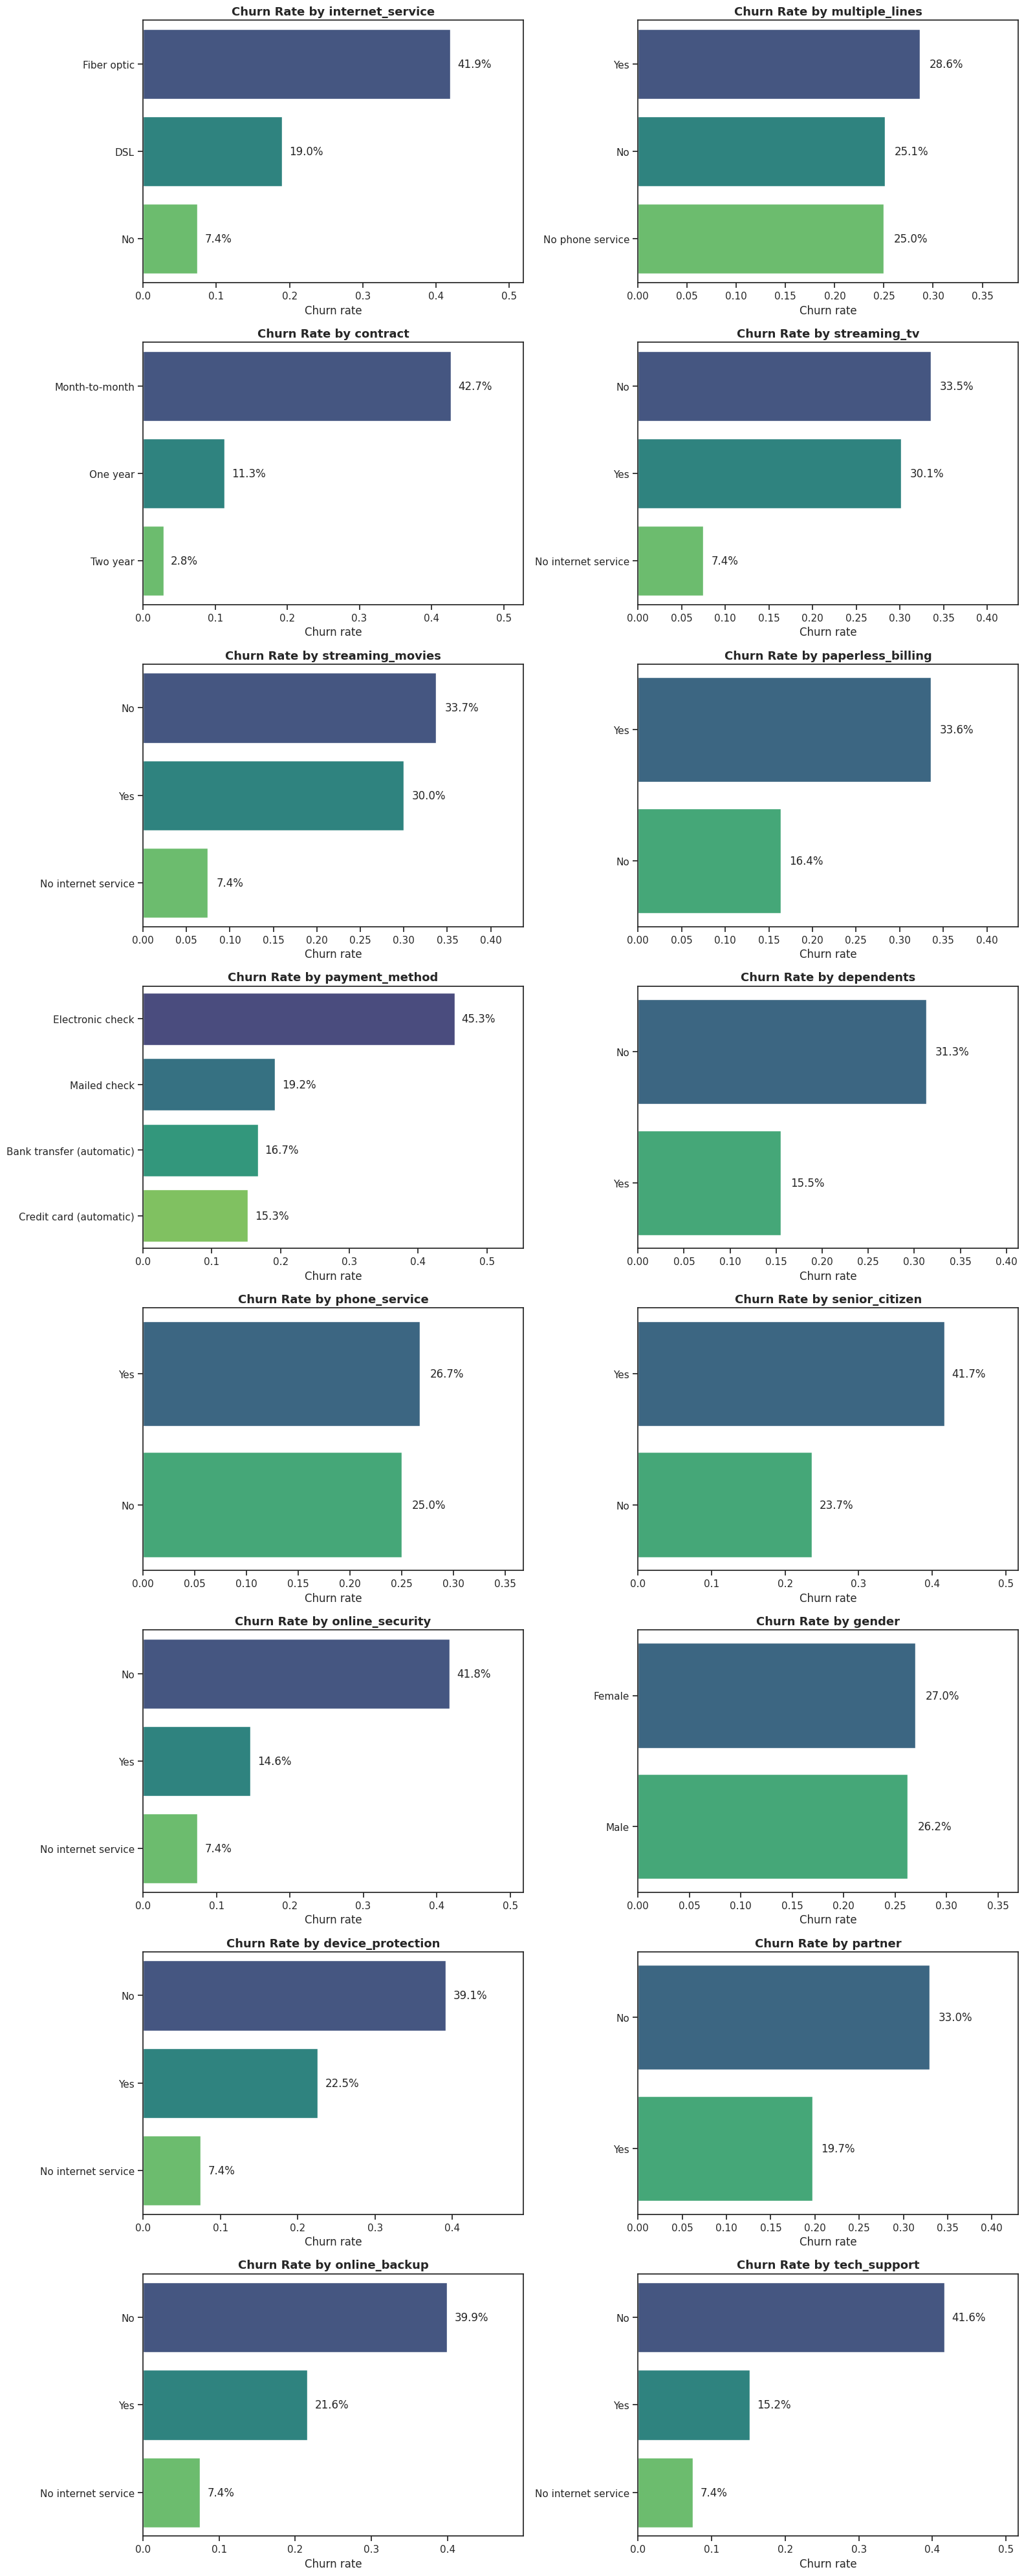

In [50]:
sns.set(style="ticks")

cat_cols = categorical_columns  # tu lista de categóricas
n_cols = 2
n_rows = int(np.ceil(len(cat_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 5*n_rows))
axes = np.array(axes).reshape(-1)

for i, col in enumerate(cat_cols):
    
    ax = axes[i]
    
    # calcular churn rate
    churn_rate = (
        df.groupby(col)['churn']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )
    
    churn_rate = churn_rate["Yes"].sort_values(ascending=False)
    
    sns.barplot(
        x=churn_rate.values,
        y=churn_rate.index,
        ax=ax,
        palette="viridis"
    )
    
    ax.set_title(f"Churn Rate by {col}", fontsize=13, weight="bold")
    ax.set_xlabel("Churn rate")
    ax.set_ylabel("")
    
    # etiquetas %
    for j, v in enumerate(churn_rate.values):
        ax.text(v + 0.01, j, f"{v:.1%}", va="center")
    
    ax.set_xlim(0, churn_rate.max() + 0.1)

# borrar ejes vacíos
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Key Drivers Identified

* Customers under month-to-month contracts exhibit significantly higher churn rates.
* Payment method, particularly electronic check, is strongly associated with churn.
* Customers without value-added services (tech support, online security, backup) churn at much higher rates.
* Fiber optic customers show higher churn compared to DSL users.
* Demographic variables such as gender show minimal impact.



/tmp/ipykernel_299130/444313442.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["churn"]
/tmp/ipykernel_299130/444313442.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


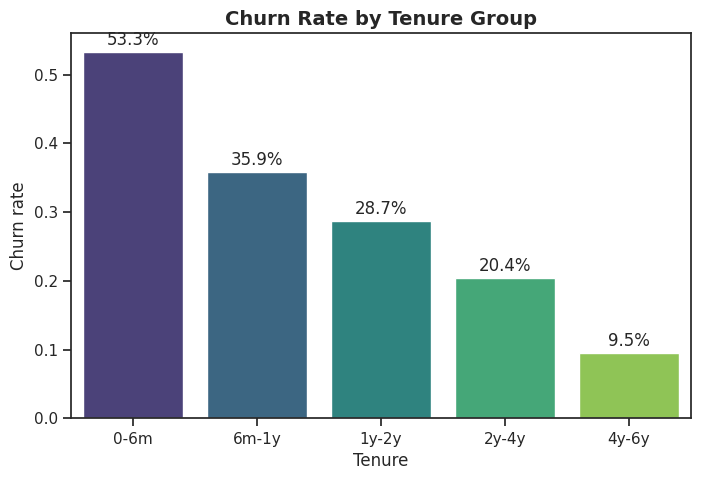

In [55]:
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[0, 6, 12, 24, 48, 72],
    labels=["0-6m", "6m-1y", "1y-2y", "2y-4y", "4y-6y"]
)

tenure_churn = (
    df.groupby("tenure_group")["churn"]
    .value_counts(normalize=True)
    .unstack()
)

tenure_churn = tenure_churn["Yes"].reset_index()

plt.figure(figsize=(8,5))
ax = sns.barplot(
    data=tenure_churn,
    x="tenure_group",
    y="Yes",
    palette="viridis"
)

plt.title("Churn Rate by Tenure Group", fontsize=14, weight="bold")
plt.ylabel("Churn rate")
plt.xlabel("Tenure")

for i, v in enumerate(tenure_churn["Yes"]):
    ax.text(i, v + 0.01, f"{v:.1%}", ha="center")

plt.show()

/tmp/ipykernel_299130/248648851.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["tenure_group","contract"])["churn"]


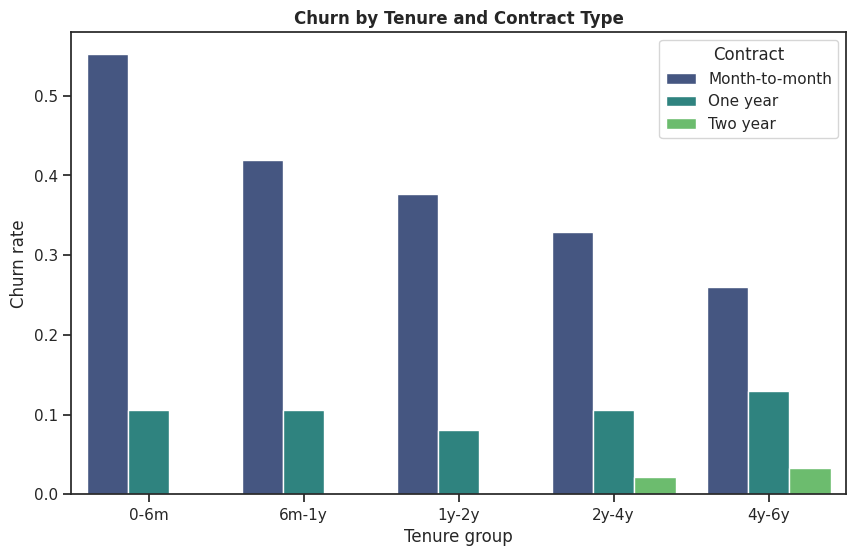

In [56]:
contract_tenure = (
    df.groupby(["tenure_group","contract"])["churn"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

contract_tenure = contract_tenure["Yes"].reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=contract_tenure,
    x="tenure_group",
    y="Yes",
    hue="contract",
    palette="viridis"
)

plt.title("Churn by Tenure and Contract Type", weight="bold")
plt.ylabel("Churn rate")
plt.xlabel("Tenure group")
plt.legend(title="Contract")

plt.show()


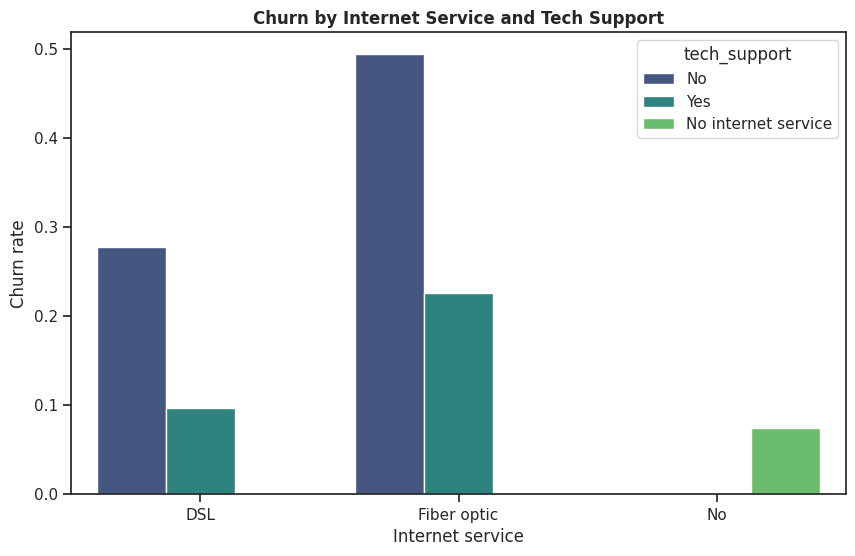

In [57]:
internet_support = (
    df.groupby(["internet_service","tech_support"])["churn"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

internet_support = internet_support["Yes"].reset_index()

plt.figure(figsize=(10,6))
sns.barplot(
    data=internet_support,
    x="internet_service",
    y="Yes",
    hue="tech_support",
    palette="viridis"
)

plt.title("Churn by Internet Service and Tech Support", weight="bold")
plt.ylabel("Churn rate")
plt.xlabel("Internet service")
plt.show()


### Key Structural Insights on Customer Churn

* Churn is highly concentrated in the early stages of the customer lifecycle, particularly within the first year.
* Contract type is the strongest predictor of churn, with month-to-month customers exhibiting significantly higher churn rates.
* Customers using fiber optic services without additional support services present some of the highest churn rates.
* Value-added services such as tech support significantly reduce churn across all customer segments.
* Long-tenure customers under longer contracts demonstrate strong retention and low churn risk.


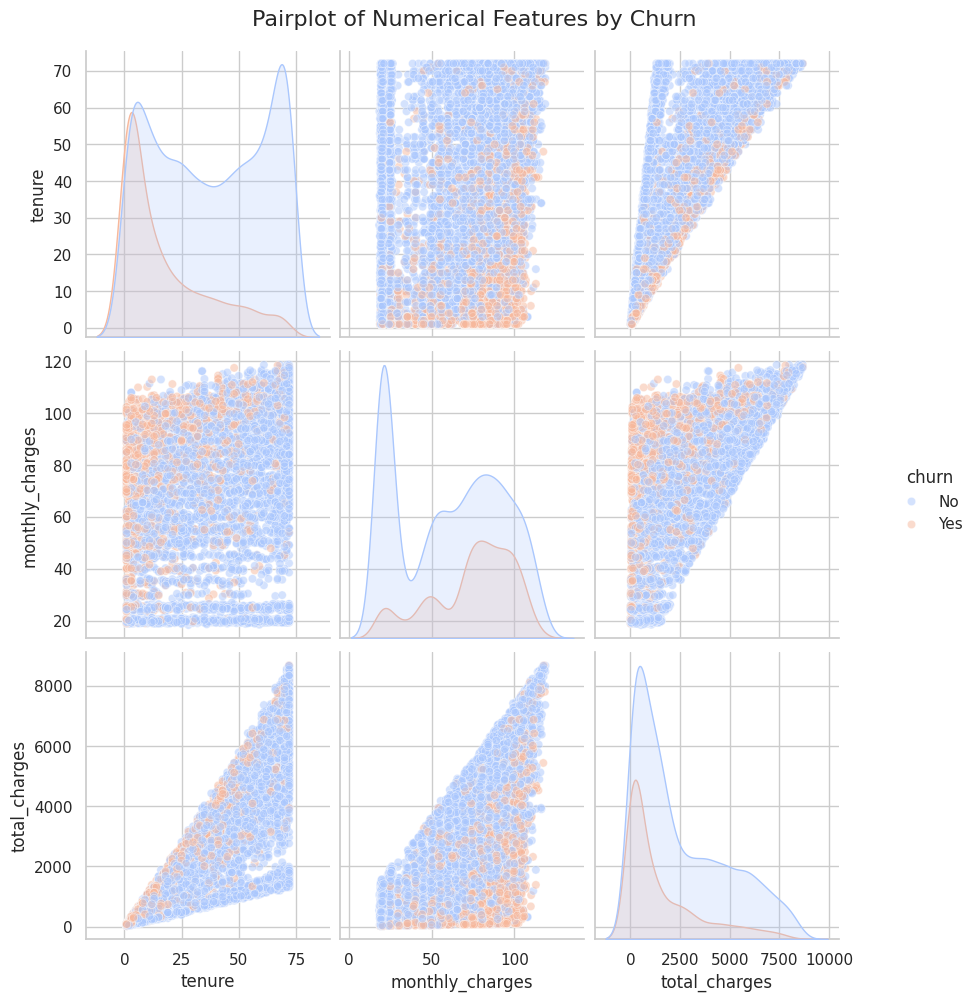

In [62]:
sns.set(style="whitegrid")

cols = ["tenure", "monthly_charges", "total_charges", "churn"]

pair = sns.pairplot(
    df[cols],
    hue="churn",
    palette="coolwarm",
    diag_kind="kde",
    plot_kws={"alpha":0.5}
)

pair.fig.set_size_inches(10,10)
pair.fig.suptitle("Pairplot of Numerical Features by Churn", y=1.02, fontsize=16)

plt.show()


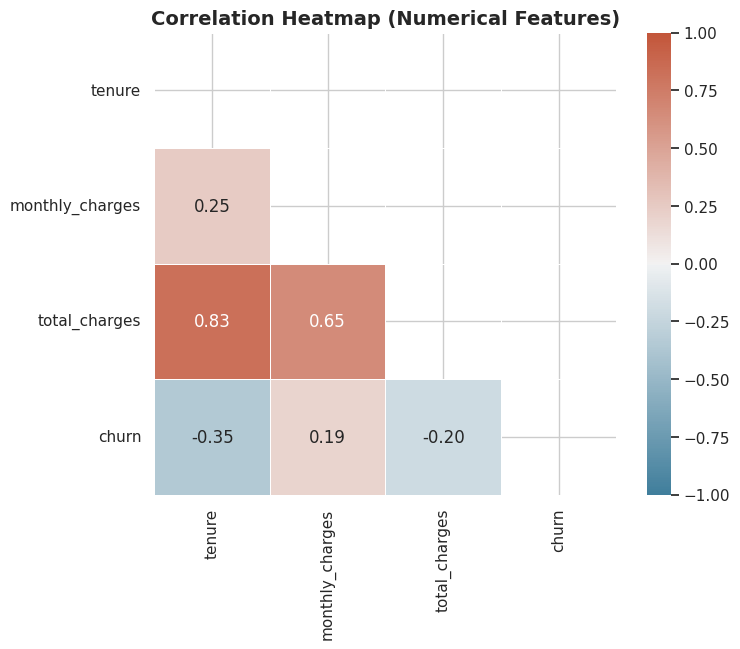

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Copia para no modificar original
df_corr = df.copy()

# Convertir churn a numérico solo para correlación
df_corr["churn"] = df_corr["churn"].map({"Yes":1, "No":0})

corr = df_corr[cols].corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8,6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=.5
)

plt.title("Correlation Heatmap (Numerical Features)", fontsize=14, weight="bold")
plt.show()


Pairwise relationships among numerical variables confirm that churn is concentrated among low-tenure customers, with limited separation across other numerical features.


/tmp/ipykernel_299130/2134367287.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='churn', palette='Set2')


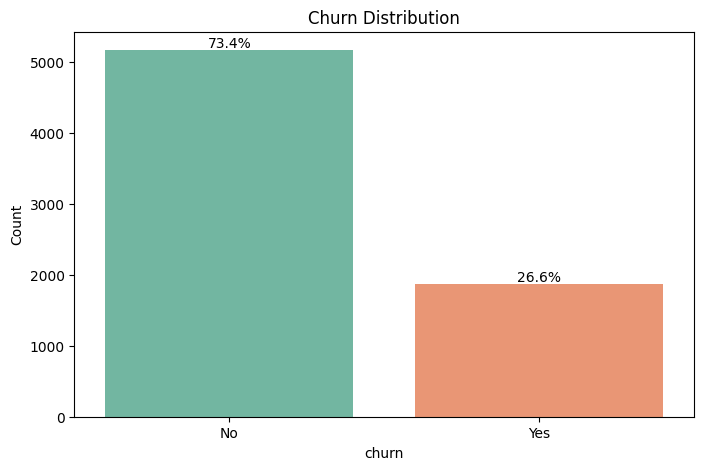

In [27]:
plt.figure(figsize=(8,5))
ax = sns.countplot(data=df, x='churn', palette='Set2')

total = len(df)

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Churn Distribution')
plt.ylabel('Count')
plt.show()


- 26.6% of the customers switched to another provider.

### Conclusion

* Customer churn (~26%) is primarily concentrated in the early stages of the customer lifecycle, with significantly higher churn among customers with low tenure.
* Contract type is the strongest driver of churn: customers under month-to-month contracts show substantially higher churn compared to those with annual or two-year contracts.
* Customers with higher monthly charges and flexible contracts tend to churn more frequently, suggesting pricing sensitivity and lower commitment.
* Value-added services such as tech support, online security, and backup are associated with lower churn, indicating that higher engagement and perceived value improve retention.
* Payment behavior also plays an important role: customers using electronic check exhibit notably higher churn compared to those using automatic payment methods.
* Demographic variables such as gender show minimal impact on churn, while behavioral and service-related variables are more influential.

**Conclusion:**
Churn is mainly driven by contract flexibility, early customer lifecycle, service engagement, and payment behavior. These insights provide a strong foundation for building predictive models and designing targeted retention strategies.